In [6]:
from ANN import *
import wandb

In [7]:
# load data
train_data = load_data(config.train_data_path)
test_data = load_data(config.test_data_path)

14:41:58 [INFO] Loading mnist_train.csv
14:42:00 [INFO] Loaded mnist_train.csv
14:42:00 [INFO] Loading mnist_test.csv
14:42:00 [INFO] Loaded mnist_test.csv


In [8]:
config = SimpleNamespace(
    run_name="more_complex_run",
    epochs=50,  # Number of epochs
    batch_size=64,  # Batch size
    learning_rate=0.2,  # Starting learning rate
    lr_decay_rate=0.95,  # How much to decay the learning rate
    lr_decay_frequency=4,  # Decay learning rate every 5 epochs
    early_stop_patience=10,  # Early stopping patience
    train_data_path="mnist_train.csv",
    test_data_path="mnist_test.csv",
)

In [9]:
# create network
network = NeuralNetwork()
network.add_layer(NeuralLayer(784, "input", activation_function=None))
network.add_layer(NeuralLayer(256, "hidden", activation_function="relu", dropout_rate=0.2))
network.add_layer(NeuralLayer(10, "output", activation_function="softmax"))

14:42:02 [INFO] Starting training


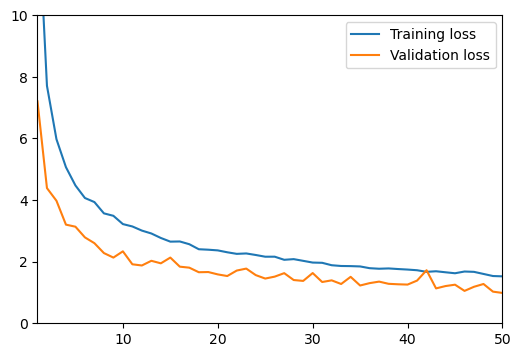

16:20:08 [INFO] Saved network to mnist_network.npy
wandb: WARNING Serializing object of type ndarray that is 1605760 bytes


accuracy,▁▄▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇█▇█▇██▇▇████▇█
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
learning_rate,█▇▇▆▅▅▄▃▃▂▂▁▁
training_loss,█▄▄▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▂▁▁▁▁▁▁
accuracy,0.8976
epoch,49
learning_rate,0.10267
training_loss,1.52391
validation_loss,0.98495


In [10]:
with wandb.init(project="ANN_from_scratch", 
                group="train",
                config=config):
    network.stochastic_gradient_descent(train_data=train_data,
                                        test_data=test_data,
                                        config=config)
    network.save("mnist_network.npy")